In [1]:
import pandas as pd
df=pd.read_csv('Raw data_magaya/Maintenance/Carrier List.csv')
df.head()

,Name,Phone,Mobile Phone,Email,Fax,Website,Account Number,Contact First Name,Contact Last Name,Identification Number,...,Payment Terms,IATA Account Number,Airline Prefix,Airline Code,FMC,SCAC Code,Available Credit (CAD),Billing Period,Incoterms,1099 Eligible
0,JE FORTIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Never Apply,NaN,No
1,Transport LFL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Never Apply,NaN,No
2,DID Logistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Never Apply,NaN,No
3,Dole Shipping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Never Apply,NaN,No
4,Dan Freight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Never Apply,NaN,No


In [17]:
df.shape

(51, 63)

In [8]:
for col in df.columns:
    p = df[col].count()  # counts non-NaN entries
    print(f"{col}: {p}")



Name: 51
Phone: 1
Mobile Phone: 1
Email: 1
Fax: 0
Website: 0
Account Number: 0
Contact First Name: 1
Contact Last Name: 1
Identification Number: 0
Ident. number type: 51
System ID: 51
Street and Number: 0
City: 0
State: 0
Country: 0
Zip code: 0
Parent Account: 0
Carrier Type: 51
Method code: 51
Carrier code: 0
Phone Extension: 1
IP Address: 51
Street and Number 1: 0
Street and Number 2: 0
Street and Number 3: 0
Billing Street and Number: 0
Billing City: 0
Billing State: 0
Billing Country: 0
Billing Zip Code: 0
Billing Street and Number 1: 0
Billing Street and Number 2: 0
Billing Street and Number 3: 0
Entity ID: 0
Inactive: 51
Has Transactions: 51
Type: 51
Known Shipper: 51
Known Shipper Expiration Date: 0
Notes: 0
Attachments: 51
Creation Date: 51
Division: 0
Transaction Tracking: 51
Prepaid: 51
Date of Birth: 0
Last Screening Status: 0
Last Screening Date: 0
Preferred Currency: 0
Balance (CAD): 51
Credit Limit (CAD): 51
Due Days: 51
Payment Terms: 0
IATA Account Number: 0
Airline Pre

In [20]:
# Find columns with all NaN (or no non-NaN values)
cols_to_drop = [col for col in df.columns if df[col].count() == 0]

# Drop them
df_cleaned = df.drop(columns=cols_to_drop)

print(f"Dropped columns: {cols_to_drop}")


Dropped columns: ['Fax', 'Website', 'Account Number', 'Identification Number', 'Street and Number', 'City', 'State', 'Country', 'Zip code', 'Parent Account', 'Carrier code', 'Street and Number 1', 'Street and Number 2', 'Street and Number 3', 'Billing Street and Number', 'Billing City', 'Billing State', 'Billing Country', 'Billing Zip Code', 'Billing Street and Number 1', 'Billing Street and Number 2', 'Billing Street and Number 3', 'Entity ID', 'Known Shipper Expiration Date', 'Notes', 'Division', 'Date of Birth', 'Last Screening Status', 'Last Screening Date', 'Preferred Currency', 'Payment Terms', 'IATA Account Number', 'Airline Prefix', 'Airline Code', 'FMC', 'SCAC Code', 'Incoterms']


In [22]:
df_cleaned.shape

(51, 26)

In [23]:
# collect results in a list of dicts
unique_counts = []

for col in df_cleaned.columns:
    p = df_cleaned[col].nunique()
    unique_counts.append({"column": col, "unique_values": p})

# convert to DataFrame
df_unique_counts = pd.DataFrame(unique_counts)

print(df_unique_counts)




Name: 49 unique values
Phone: 1 unique values
Mobile Phone: 1 unique values
Email: 1 unique values
Contact First Name: 1 unique values
Contact Last Name: 1 unique values
Ident. number type: 1 unique values
System ID: 1 unique values
Carrier Type: 2 unique values
Method code: 2 unique values
Phone Extension: 1 unique values
IP Address: 1 unique values
Inactive: 1 unique values
Has Transactions: 2 unique values
Type: 1 unique values
Known Shipper: 1 unique values
Attachments: 1 unique values
Creation Date: 39 unique values
Transaction Tracking: 1 unique values
Prepaid: 1 unique values
Balance (CAD): 1 unique values
Credit Limit (CAD): 1 unique values
Due Days: 1 unique values
Available Credit (CAD): 1 unique values
Billing Period: 1 unique values
1099 Eligible: 1 unique values


In [24]:
cols_single_value = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 1]

df_final = df_cleaned.drop(columns=cols_single_value)

print(f"Dropped columns with only one unique value: {cols_single_value}")


Dropped columns with only one unique value: ['Phone', 'Mobile Phone', 'Email', 'Contact First Name', 'Contact Last Name', 'Ident. number type', 'System ID', 'Phone Extension', 'IP Address', 'Inactive', 'Type', 'Known Shipper', 'Attachments', 'Transaction Tracking', 'Prepaid', 'Balance (CAD)', 'Credit Limit (CAD)', 'Due Days', 'Available Credit (CAD)', 'Billing Period', '1099 Eligible']


In [25]:
df_final

,Name,Carrier Type,Method code,Has Transactions,Creation Date
0,JE FORTIN,Land Carrier,Ground,No,01/03/2025
1,Transport LFL,Land Carrier,Ground,No,01/02/2025
2,DID Logistics,Land Carrier,Ground,No,12/26/2024
3,Dole Shipping,Ocean Carrier,Ocean,No,12/12/2024
4,Dan Freight,Land Carrier,Ground,No,11/15/2024
5,Argus Transportation,Land Carrier,Ground,No,07/18/2024
6,Elevated,Land Carrier,Ground,No,06/04/2024
7,SFX Transport,Land Carrier,Ground,No,06/03/2024
8,Ulloa Transport,Land Carrier,Ground,No,05/09/2024
9,Lealta Transport,Land Carrier,Ground,No,05/09/2024


In [26]:
df_final.to_csv('processing_data/Carrier_dim.csv', index=False)


In [12]:
import chardet

# Read a sample of bytes from the file
with open('Raw data_magaya/Maintenance/Customer List.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))

print(result)


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [31]:
df_customer = pd.read_csv('processing_data/cleaned_vendor List.csv', encoding='cp1252')
df_customer.head()



,Account Number,Name,Street and Number,City,State,Country,Zip code,Phone,Mobile Phone,Email,...,Has Open Transactions,Prepaid,Preferred Currency,Balance (CAD),Due Days,Payment Terms,Billing Period,Last Payment Amount (CAD),Last Payment Date,Supplier Invoice?
0,NaN,San Diego Refrigerated Services Inc. DBA Harbo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Yes,NaN,0.00,0,NaN,Never Apply,"1,227.40",01/13/2025,No
1,NaN,DID Logistics INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Yes,NaN,0.00,0,NaN,Never Apply,"5,028.50",01/09/2025,No
2,NaN,Academia de EspaÃ±ol PROBIGUA,NaN,NaN,NaN,NaN,NaN,(502) 59630640,NaN,NaN,...,Yes,Yes,NaN,"2,599.42",0,NaN,Never Apply,0.00,NaN,No
3,NaN,"DOLE OCEAN CARGO EXPRESS, LLC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Yes,NaN,0.00,0,NaN,Never Apply,"7,196.10",01/10/2025,No
4,NaN,EugÃ©nie Dejonckheere,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,NaN,411.51,0,NaN,Never Apply,0.00,NaN,No


In [32]:
for col in df_customer.columns:
    p_c = df_customer[col].nunique()
    print(f"{col}: {p_c} unique values")

Account Number: 36 unique values
Name: 323 unique values
Street and Number: 54 unique values
City: 74 unique values
State: 33 unique values
Country: 6 unique values
Zip code: 81 unique values
Phone: 60 unique values
Mobile Phone: 2 unique values
Email: 29 unique values
Fax: 4 unique values
Website: 5 unique values
Contact First Name: 22 unique values
Contact Last Name: 8 unique values
Identification Number: 2 unique values
Street and Number 1: 54 unique values
Street and Number 2: 6 unique values
Billing Street and Number: 40 unique values
Billing City: 42 unique values
Billing State: 22 unique values
Billing Country: 6 unique values
Billing Zip Code: 36 unique values
Billing Street and Number 1: 40 unique values
Billing Street and Number 2: 6 unique values
Entity ID: 3 unique values
Has Transactions: 2 unique values
Has Open Transactions: 2 unique values
Prepaid: 2 unique values
Preferred Currency: 2 unique values
Balance (CAD): 42 unique values
Due Days: 5 unique values
Payment Terms

In [16]:
df_job =pd.read_csv('Raw data_magaya/Jobs/Job List.csv', encoding='cp1252')
df_job.head()

,Status,Number,Supplier,Due Date,Customer,Income,Expense,Profit,Customer:Account Number,Date,End Date,Employee,Description,Last Event,Division,Progress (%),Division:Name,Customer:Billing Client,Division:State
0,Open,4637,Marplantis Organic Sustainable Agriculture,01/10/2025,NaN,0.00,"18,337.05","-18,337.05",NaN,01/10/2025,01/10/2025,David Melo,NaN,NaN,NaN,11,NaN,NaN,NaN
1,Open,4634,C.I. AGRICOLAS LAS FLORES S.A.S.,01/08/2025,NaN,0.00,"19,545.98","-19,545.98",NaN,01/08/2025,01/08/2025,David Melo,NaN,NaN,NaN,11,NaN,NaN,NaN
2,Open,4631,Latbio S.A.,01/08/2025,NaN,0.00,0.00,0.00,NaN,01/08/2025,01/08/2025,David Melo,NaN,NaN,NaN,11,NaN,NaN,NaN
3,Open,4630,Hacienda Celia María C.A.,01/08/2025,NaN,0.00,"18,493.31","-18,493.31",NaN,01/08/2025,01/08/2025,David Melo,NaN,NaN,NaN,11,NaN,NaN,NaN
4,Open,4633,C.I. AGRICOLAS LAS FLORES S.A.S.,01/08/2025,NaN,0.00,"19,545.98","-19,545.98",NaN,01/08/2025,01/08/2025,David Melo,NaN,NaN,NaN,11,NaN,NaN,NaN


In [19]:
df_job.shape

(2744, 19)

In [29]:
import pandas as pd
import os

folder = 'processing_data'

for file in os.listdir(folder):
    if file.endswith('.csv'):
        path = os.path.join(folder, file)
        print(f"\n📄 {file}")
        df = pd.read_csv(path, encoding='cp1252')
        print(df.head(), "\n", "="*40)



📄 cleaned_Shipment list.csv
     Status    Type   Waybill Number        Date  \
0  Received   Ocean   DOLQSMRD4772WL  01/10/2025   
1  Received   Ocean   DOLQSMRD4771WL  01/10/2025   
2  Received  Ground              NaN  01/09/2025   
3  Received   Ocean  ZIMUGYL00014121  01/08/2025   
4  Received   Ocean  ZIMUGYL00014176  01/08/2025   

                                      Shipper             Consignee  \
0            C.I. AGRICOLAS LAS FLORES S.A.S.  United Safety Agents   
1            C.I. AGRICOLAS LAS FLORES S.A.S.  United Safety Agents   
2                 Coliman Pacific Corporation       Equifruit, Inc.   
3  Marplantis Organic Sustainable Agriculture       Equifruit, Inc.   
4  Marplantis Organic Sustainable Agriculture  United Safety Agents   

         Carrier         Origin Port    Destination Port  Pieces  ...  \
0  Dole Shipping  Port of Wilmington  Port of Wilmington       1  ...   
1  Dole Shipping         Santa Marta  Port of Wilmington       1  ...   
2           

In [37]:
df_purchase= pd.read_csv('Raw data_magaya/purchase orders/Purchase Order List.csv')
df_purchase.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 422: invalid start byte

In [35]:
df_purchase.shape

(977, 75)

In [34]:
# collect results in a list of dicts
unique_counts = []

for col in df_purchase.columns:
    p = df_purchase[col].nunique()
    unique_counts.append({"column": col, "unique_values": p})

# convert to DataFrame
df_unique_counts = pd.DataFrame(unique_counts)

print(df_unique_counts)

                    column  unique_values
0                   Status              6
1                   Number            977
2                   Seller             11
3                  Carrier             13
4                   Amount            169
..                     ...            ...
70  Cornerboards Packaging              3
71         Port of Loading              9
72       Customs Clearance              2
73              Buyer:Name              1
74    Buyer:Account Number              0

[75 rows x 2 columns]


In [3]:
import pandas as pd
df_jobs= pd.read_csv('jobs/Job List.csv', encoding='cp1252')
df_jobs.head()

,Status,Number,Supplier,Due Date,Customer,Income,Expense,Profit,Customer:Account Number,Date,End Date,Employee,Description,Last Event,Division,Progress (%),Division:Name,Customer:Billing Client,Division:State
0,Open,4637,Marplantis Organic Sustainable Agriculture,01/10/2025,NaN,0.00,"18,337.05","-18,337.05",NaN,01/10/2025,01/10/2025,David Melo,NaN,NaN,NaN,11,NaN,NaN,NaN
1,Open,4634,C.I. AGRICOLAS LAS FLORES S.A.S.,01/08/2025,NaN,0.00,"19,545.98","-19,545.98",NaN,01/08/2025,01/08/2025,David Melo,NaN,NaN,NaN,11,NaN,NaN,NaN
2,Open,4631,Latbio S.A.,01/08/2025,NaN,0.00,0.00,0.00,NaN,01/08/2025,01/08/2025,David Melo,NaN,NaN,NaN,11,NaN,NaN,NaN
3,Open,4630,Hacienda Celia María C.A.,01/08/2025,NaN,0.00,"18,493.31","-18,493.31",NaN,01/08/2025,01/08/2025,David Melo,NaN,NaN,NaN,11,NaN,NaN,NaN
4,Open,4633,C.I. AGRICOLAS LAS FLORES S.A.S.,01/08/2025,NaN,0.00,"19,545.98","-19,545.98",NaN,01/08/2025,01/08/2025,David Melo,NaN,NaN,NaN,11,NaN,NaN,NaN


In [6]:
# collect results in a list of dicts
unique_counts = []

for col in df_jobs.columns:
    p = df_jobs[col].nunique()
    unique_counts.append({"column": col, "unique_values": p})

# convert to DataFrame
df_unique_counts = pd.DataFrame(unique_counts)

print(df_unique_counts)

                     column  unique_values
0                    Status              2
1                    Number           2739
2                  Supplier             14
3                  Due Date            922
4                  Customer             22
5                    Income           1672
6                   Expense           2651
7                    Profit           2671
8   Customer:Account Number             14
9                      Date            350
10                 End Date            102
11                 Employee              8
12              Description              0
13               Last Event              0
14                 Division              0
15             Progress (%)             17
16            Division:Name              0
17  Customer:Billing Client              1
18           Division:State              0


In [4]:
df_jobs.shape

(2744, 19)

In [5]:
df_jobs_cleaned = pd.read_csv('Cleaned_data/Job_list.csv', encoding='cp1252')
df_jobs_cleaned.head()

,Status,Number,Supplier,Due Date,Customer,Income,Expense,Profit,Customer:Account Number,Date,End Date,Employee,Progress (%)
0,Open,4637,Marplantis Organic Sustainable Agriculture,01/10/2025,NaN,0.00,"18,337.05","-18,337.05",NaN,01/10/2025,01/10/2025,David Melo,11
1,Open,4634,C.I. AGRICOLAS LAS FLORES S.A.S.,01/08/2025,NaN,0.00,"19,545.98","-19,545.98",NaN,01/08/2025,01/08/2025,David Melo,11
2,Open,4631,Latbio S.A.,01/08/2025,NaN,0.00,0.00,0.00,NaN,01/08/2025,01/08/2025,David Melo,11
3,Open,4630,Hacienda Celia MarÃ­a C.A.,01/08/2025,NaN,0.00,"18,493.31","-18,493.31",NaN,01/08/2025,01/08/2025,David Melo,11
4,Open,4633,C.I. AGRICOLAS LAS FLORES S.A.S.,01/08/2025,NaN,0.00,"19,545.98","-19,545.98",NaN,01/08/2025,01/08/2025,David Melo,11


In [ ]:
df_jobs_cleaned.shape

In [7]:
df_jobs_cleaned.columns

Index(['Status', 'Number', 'Supplier', 'Due Date', 'Customer', 'Income',
       'Expense', 'Profit', 'Customer:Account Number', 'Date', 'End Date',
       'Employee', 'Progress (%)'],
      dtype='object')

NaN Percentage in 'Customer': 41.00%


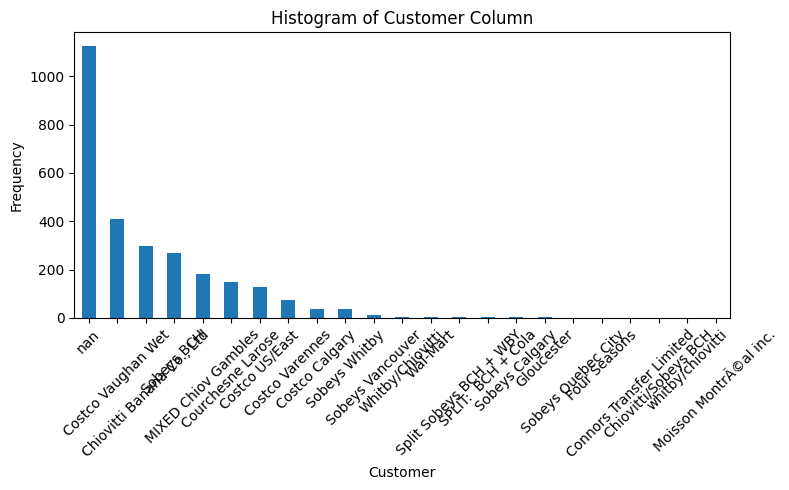

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: assume your cleaned dataframe is already loaded
# df_jobs_cleaned = ...

# 1️⃣ Calculate NaN percentage in 'Customer'
nan_percentage = df_jobs_cleaned['Customer'].isna().mean() * 100
print(f"NaN Percentage in 'Customer': {nan_percentage:.2f}%")

# 2️⃣ Plot histogram of 'Customer'
plt.figure(figsize=(8,5))
df_jobs_cleaned['Customer'].value_counts(dropna=False).plot(kind='bar')
plt.title("Histogram of Customer Column")
plt.xlabel("Customer")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# jobs list customer is missing, try to filling in or at least figure out where the processing_data could be found
df_customer = pd.read_csv('Cleaned_data/Maintenance_Customer List.csv', encoding='cp1252')
df_customer.head()

,Account Number,Name,Street and Number,City,State,Country,Zip code,Phone,Email,Contact First Name,...,Inactive,Has Transactions,Creation Date,Has Open Transactions,Prepaid,Balance (CAD),Due Days,Payment Terms,Last Payment Amount (CAD),Last Payment Date
0,NaN,Sprouts Farmers Market - Distribution Centers,5445 West Missouri Ave,Glendale,AZ,United States,85301,NaN,AP@Sprouts.com,NaN,...,No,No,01/08/2025,No,No,0.00,30,Net 30,0.00,NaN
1,C00006/005,COSTCO BRANTFORD,175 ROY BOULEVARD,"BRANTFORD,",ON,Canada,N3R 7K1,NaN,NaN,NaN,...,No,Yes,11/15/2024,No,No,0.00,30,Net 30,"3,360.97",12/09/2024
2,NaN,Michelle Gubbells,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Yes,09/16/2024,No,No,0.00,30,Net 30,385.72,10/28/2024
3,NaN,Maersk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Yes,08/20/2024,No,No,0.00,30,Net 30,"1,852.84",08/15/2024
4,NaN,Agence du revenu du Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Yes,06/10/2024,Yes,No,"2,191.66",30,Net 30,"1,610.73",12/18/2024


In [16]:
df_customer['Name'].unique()

array(['Sprouts Farmers Market - Distribution Centers',
       'COSTCO BRANTFORD', 'Michelle Gubbells', 'Maersk',
       'Agence du revenu du Canada', 'Revenu QuÃ©bec', 'Costco Canada',
       'Holt Cargo Systems', 'Charlies Los Angeles', 'Equifruit',
       'Charlies Seattle', 'Wal-Mart',
       'Fairtrade Labelling Organizations Inter. e.V.', 'Latbio S.A.',
       'Four Seasons', 'Costco Etobicoke', 'Sobeys Winnipeg',
       'East Coast', 'Moisson MontrÃ©al inc.', 'Top Banana',
       'Krown Produce  Fresh At Its Bestâ„¢', 'Costco US/East',
       'Costco Calgary', 'Gambles', 'Costco London', 'Sobeys Vancouver',
       'York University', 'Sobeys Calgary', 'Split Sobeys BCH + WBY',
       'Sobeys Quebec City', 'DegranprÃ© Chait', 'Gloucester', 'Musket',
       'Connors Transfer Limited', 'Costco Varennes', 'Loadex',
       'Sobeys Whitby', 'RÃ©seaux Plein Air Drummond Inc',
       'ITradeNetwork', 'SPLIT:  BCH + Cola', 'MIXED Chiov Gambles',
       'Scotlynn', 'Chiovitti Banana Co., L

In [17]:
df_vendor = pd.read_csv('Cleaned_data/Vendor.csv', encoding='cp1252')
df_vendor.head()

,Account Number,Name,Street and Number,City,State,Country,Zip code,Phone,Mobile Phone,Email,...,Has Open Transactions,Prepaid,Preferred Currency,Balance (CAD),Due Days,Payment Terms,Billing Period,Last Payment Amount (CAD),Last Payment Date,Supplier Invoice?
0,NaN,San Diego Refrigerated Services Inc. DBA Harbo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Yes,NaN,0.00,0,NaN,Never Apply,"1,227.40",01/13/2025,No
1,NaN,DID Logistics INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Yes,NaN,0.00,0,NaN,Never Apply,"5,028.50",01/09/2025,No
2,NaN,Academia de EspaÃ±ol PROBIGUA,NaN,NaN,NaN,NaN,NaN,(502) 59630640,NaN,NaN,...,Yes,Yes,NaN,"2,599.42",0,NaN,Never Apply,0.00,NaN,No
3,NaN,"DOLE OCEAN CARGO EXPRESS, LLC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Yes,NaN,0.00,0,NaN,Never Apply,"7,196.10",01/10/2025,No
4,NaN,EugÃ©nie Dejonckheere,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,NaN,411.51,0,NaN,Never Apply,0.00,NaN,No


In [18]:
df_vendor['Name'].unique()

array(['San Diego Refrigerated Services Inc. DBA Harborside Operating Account',
       'DID Logistics INC', 'Academia de EspaÃ±ol PROBIGUA',
       'DOLE OCEAN CARGO EXPRESS, LLC', 'EugÃ©nie Dejonckheere',
       "Alliance pour l'engagement jeunesse | alliance-jeunesse.org",
       'Cari St-Laurent', 'Immigration Lamonde inc.',
       'Phoenix Media Network Inc.', 'York U',
       'Calgary Produce Marketing Association', 'OREPRODU SA',
       'UniversitÃ© McGill', 'C.I. LA SAMARIA S.A.S', 'Visa Banque Royal',
       'Association Inti', 'Ashley McPhee', 'Nathalie Charron',
       'Gaylord Opryland Resort and Convention Center',
       'Ordre des Agronomes du QuÃ©bec', 'CMA CGM',
       'LTB Magazine (SociÃ©tÃ© ParallÃ¨le)',
       'Karene-Isabelle Jean-Baptiste', 'Pelletier & Cie avocats inc.',
       'Blue Horseshoe', 'CMA CGM (CANADA) INC', 'helloDARWIN',
       'Pro-Cert Organic Systems Ltd.',
       "Cathy's Action Packed Inc./Let's Party",
       "l'Ã‰cole de la Magdeleine",
      

In [20]:
df_carrier = pd.read_csv('Cleaned_data/Carrier_dim.csv', encoding='cp1252')
df_carrier.head()

,Name,Carrier Type,Method code,Has Transactions,Creation Date
0,JE FORTIN,Land Carrier,Ground,No,01/03/2025
1,Transport LFL,Land Carrier,Ground,No,01/02/2025
2,DID Logistics,Land Carrier,Ground,No,12/26/2024
3,Dole Shipping,Ocean Carrier,Ocean,No,12/12/2024
4,Dan Freight,Land Carrier,Ground,No,11/15/2024


In [21]:
df_carrier['Name'].unique()

array(['JE FORTIN', 'Transport LFL', 'DID Logistics', 'Dole Shipping',
       'Dan Freight', 'Argus Transportation', 'Elevated', 'SFX Transport',
       'Ulloa Transport', 'Lealta Transport', 'Traffic Tech',
       'Dhanoa Enterprises', 'COSCO Shipping', 'Highway Motor Freight',
       'TQL', 'Megacorp', 'ONE', 'TMG Logistics', 'CTX', 'HGC Inc.',
       'Gosal Trucking', 'Maersk', 'RF Cargo', 'Amplify Logistics', 'ZIM',
       'Sherrington T', 'Seafood', 'Cheema', 'Light Speed', 'Traffix',
       'Zavitz', 'G. Zavitz Ltd', 'Musket', 'Xan Systems', 'CMA',
       'Harlyn', 'Darragh', 'MSC', 'Highlight', 'Zavcor', 'Fulger',
       'Connors', 'Loadex', 'Seaboard', 'Savoie', 'Network', 'Scotlynn',
       'Holt', 'Sealand'], dtype=object)

In [22]:
df_carrier['Name'].nunique()


49

In [33]:
df_carrier[df_carrier['Name']=="Seafood"]

,Name,Carrier Type,Method code,Has Transactions,Creation Date
26,Seafood,Land Carrier,Ground,No,02/10/2023
30,Seafood,Land Carrier,Ground,No,11/04/2022


In [30]:
df_carrier[df_carrier['Carrier Type'] == "Ocean Carrier"]


,Name,Carrier Type,Method code,Has Transactions,Creation Date
3,Dole Shipping,Ocean Carrier,Ocean,No,12/12/2024
12,COSCO Shipping,Ocean Carrier,Ocean,No,04/29/2024
16,ONE,Ocean Carrier,Ocean,No,01/31/2024
21,Maersk,Ocean Carrier,Ocean,No,09/14/2023
24,ZIM,Ocean Carrier,Ocean,No,04/14/2023
36,CMA,Ocean Carrier,Ocean,No,01/07/2022
39,MSC,Ocean Carrier,Ocean,No,12/30/2021
45,Seaboard,Ocean Carrier,Ocean,No,12/16/2021
47,Network,Ocean Carrier,Ocean,No,12/15/2021
50,Sealand,Ocean Carrier,Ocean,No,12/13/2021


In [31]:
df_carrier['Has Transactions'].value_counts()

Has Transactions
No     50
Yes     1
Name: count, dtype: int64

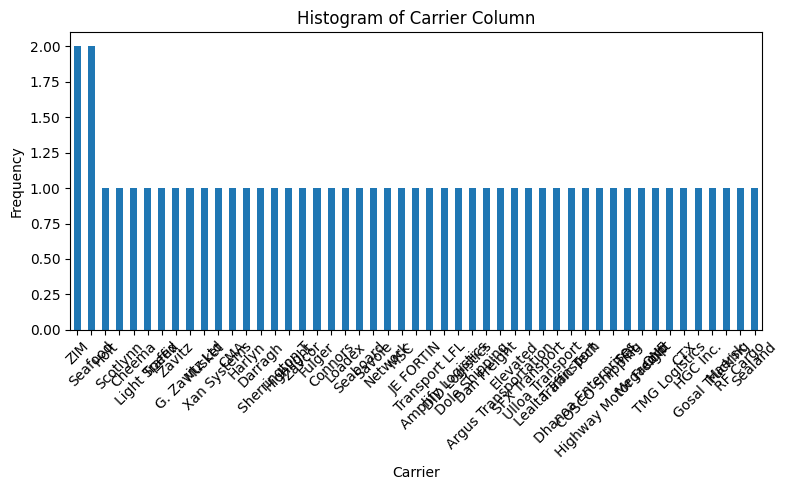

In [23]:
# 2️⃣ Plot histogram of 'Customer'
plt.figure(figsize=(8,5))
df_carrier['Name'].value_counts(dropna=False).plot(kind='bar')
plt.title("Histogram of Carrier Column")
plt.xlabel("Carrier")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
meta = {
    "table_name": "carrier_dim",
    "description": "Dimension table listing carriers, their type, method, and status.",
    "primary_key": "Name",
    "row_count": len(df_carrier),
    "column_count": df_carrier.shape[1],
    "source": "Operational carrier/vendor system",
    "notes": "Includes both land and ocean carriers; Missing interpretation on 'Has Transactions'(whether active or not), ZIM, Seafood appear twice",
}

data_dict = pd.DataFrame({
    "Column Name": df_carrier.columns,
    "Data Type": [str(df_carrier[col].dtype) for col in df_carrier.columns],
    "Description": ["", "", "", "", ""],  # Fill manually
    "Example Value": [df_carrier[col].dropna().unique()[0] for col in df_carrier.columns]
})

print(meta)
print(data_dict)


{'table_name': 'carrier_dim', 'description': 'Dimension table listing carriers, their type, method, and status.', 'primary_key': 'Name', 'row_count': 51, 'column_count': 5, 'source': 'Operational carrier/vendor system', 'notes': "Includes both land and ocean carriers; Missing interpretation on 'Has Transactions'(whether active or not), ZIM, Seafood appear twice"}
        Column Name Data Type Description Example Value
0              Name    object                 JE FORTIN
1      Carrier Type    object              Land Carrier
2       Method code    object                    Ground
3  Has Transactions    object                        No
4     Creation Date    object                01/03/2025


In [35]:
data_dict.to_csv("carrier_dim_data_dictionary.csv", index=False)


In [36]:
import json
with open("carrier_dim_metadata.json", "w") as f:
    json.dump(meta, f, indent=4)


In [38]:
df_port = pd.read_csv('Cleaned_data/Port_list.csv', encoding='cp1252')
df_port.head(10)

,Code,Name,Country,Subdivision,Air,Ocean,Rail,Road,Mail
0,USOLS,Nogales,United States,NaN,No,No,No,Yes,No
1,USGPT,Gulf Port,United States,NaN,No,Yes,No,No,No
2,TXA,Texas,United States,MD,No,No,No,Yes,No
3,TEX,Pharr,United States,NaN,No,No,No,Yes,No
4,SEA,Seattle,United States,NaN,No,No,No,Yes,No
5,PHL,Philadelphia,United States,PA,Yes,Yes,No,No,Yes
6,PHA,Pharr,United States,NaN,No,No,No,Yes,No
7,NY,New York,United States,NaN,No,No,No,No,No
8,NTD,Port Hueneme,United States,CA,Yes,Yes,Yes,Yes,No
9,NOGAL,Nogales,United States,NaN,No,No,No,No,No


In [43]:
df_port['Country'].unique()

array(['United States', 'Peru', 'Nicaragua', 'Ecuador', 'Colombia',
       'Canada'], dtype=object)

In [45]:
df_port.shape


(30, 9)

In [46]:
df_purchase = pd.read_csv('Raw data_magaya/purchase orders/purchase_order_list.csv', encoding='cp1252')
df_purchase.head(10)

,Status,Number,Seller,Carrier,Amount,Quantity,Invoiced,Departure Date,Arrival Date,Port of Arrival,...,Job:Due Date,Temperature Recorder,Band Packaging,Sticker Packaging,Cases Packaging,Cornerboards Packaging,Port of Loading,Customs Clearance,Buyer:Name,Buyer:Account Number
0,Open,4637,Marplantis Organic Sustainable Agriculture,Maersk,USD 12690.00,900,No,1/18/25,2/3/25,Philadelphia,...,1/10/25,NaN,NaN,NaN,NaN,Plastico,Puerto Bolivar,NaN,"Equifruit, Inc.",NaN
1,Open,4634,C.I. AGRICOLAS LAS FLORES S.A.S.,Dole Shipping,USD 13536.00,960,No,1/25/25,2/2/25,Wilmington,...,1/8/25,NaN,NaN,NaN,NaN,Carton,Santa Marta,NaN,"Equifruit, Inc.",NaN
2,Open,4631,Latbio S.A.,Maersk,USD 0.00,900,No,1/18/25,2/3/25,Philadelphia,...,1/8/25,NaN,NaN,NaN,NaN,Plastico,Puerto Bolivar,NaN,"Equifruit, Inc.",NaN
3,Open,4630,Hacienda Celia María C.A.,Maersk,USD 12807.00,900,No,1/18/25,2/3/25,Philadelphia,...,1/8/25,NaN,NaN,NaN,NaN,Plastico,Puerto Bolivar,NaN,"Equifruit, Inc.",NaN
4,Open,4633,C.I. AGRICOLAS LAS FLORES S.A.S.,Seaboard,USD 13536.00,960,No,1/25/25,2/4/25,Philadelphia,...,1/8/25,NaN,NaN,NaN,NaN,Carton,Santa Marta,NaN,"Equifruit, Inc.",NaN
5,Open,4632,ASOGUABO,Maersk,USD 13344.00,960,No,1/18/25,2/3/25,Philadelphia,...,1/8/25,NaN,NaN,NaN,NaN,Plastico reciclado,Puerto Bolivar,NaN,"Equifruit, Inc.",NaN
6,Open,4626,ASOGUABO,COSCO Shipping,USD 13344.00,960,No,1/18/25,1/29/25,Philadelphia,...,1/8/25,NaN,NaN,NaN,NaN,Plastico reciclado,Guayaquil,NaN,"Equifruit, Inc.",NaN
7,Open,4625,ASOGUABO,COSCO Shipping,USD 12645.00,900,No,1/18/25,1/29/25,Philadelphia,...,1/8/25,NaN,NaN,NaN,NaN,Plastico,Guayaquil,NaN,"Equifruit, Inc.",NaN
8,Open,4635,ASOGUABO,Dole Shipping,USD 12645.00,900,No,1/17/25,1/26/25,San Diego,...,1/8/25,NaN,NaN,NaN,NaN,Plastico reciclado,Guayaquil,NaN,"Equifruit, Inc.",NaN
9,Open,4629,ASOGUABO,Maersk,USD 12645.00,900,No,1/18/25,2/3/25,Philadelphia,...,1/8/25,NaN,NaN,NaN,NaN,Plastico reciclado,Puerto Bolivar,NaN,"Equifruit, Inc.",NaN


In [47]:
df_purchase.shape

(977, 75)

In [48]:
df_purchase.columns


Index(['Status', 'Number', 'Seller', 'Carrier', 'Amount', 'Quantity',
       'Invoiced', 'Departure Date', 'Arrival Date', 'Port of Arrival',
       'PARS number', 'Shipping Date', 'ISF', 'Amount (CAD)',
       'Unbilled Balance (CAD)', 'Unpaid Balance (CAD)', 'Temperature',
       'Job:Description', 'Job:Expense', 'Job:Income', 'Job:Customer', 'Type',
       'Attachments', 'Partially Received', 'Received Quantity', 'Reference',
       'Date', 'Employee', 'Buyer', 'Job', 'Weight (lb)', 'Volume (ft³)',
       'Approved By', 'Approved Date', 'Payment Terms', 'Incoterms', 'Notes',
       'Currency', 'Billing Address', 'Shipping Address', 'Seller Address',
       'Modes of Transportation', 'Last Event', 'Online', 'Exchange Rate',
       'Is Cancelled', 'Reverse Exchange Rate', 'Paid', 'Division',
       'Template Name', 'Tax Amt. (CAD)', 'Amt. Before Tax (CAD)',
       'Other Charges (CAD)', 'Items Amount (CAD)', 'Online Creator',
       'Is Printed', 'Pallets', 'Ventilation', 'Container#'

In [50]:
dfp=pd.read_csv('Cleaned_data/Purchase_fact.csv', encoding='cp1252')
dfp.head()

,Status,Number,Seller,Carrier,Amount,Quantity,Invoiced,Departure Date,Arrival Date,Port of Arrival,...,Items Amount (CAD),Pallets,Ventilation,Container#,Bill of Lading,Canadian Customs,Job:Due Date,Cornerboards Packaging,Port of Loading,Customs Clearance
0,Open,4637,Marplantis Organic Sustainable Agriculture,Maersk,USD 12690.00,900,No,1/18/25,2/3/25,Philadelphia,...,"18,337.05",Walk Global/Escobar,25.0,NaN,MAEU249009979,<none>,1/10/25,Plastico,Puerto Bolivar,NaN
1,Open,4634,C.I. AGRICOLAS LAS FLORES S.A.S.,Dole Shipping,USD 13536.00,960,No,1/25/25,2/2/25,Wilmington,...,"19,545.98",Chep,25.0,NaN,NaN,<none>,1/8/25,Carton,Santa Marta,NaN
2,Open,4631,Latbio S.A.,Maersk,USD 0.00,900,No,1/18/25,2/3/25,Philadelphia,...,0,Walk Global/Escobar,25.0,NaN,MAEU248914945,<none>,1/8/25,Plastico,Puerto Bolivar,NaN
3,Open,4630,Hacienda Celia MarÃ­a C.A.,Maersk,USD 12807.00,900,No,1/18/25,2/3/25,Philadelphia,...,"18,493.31",Walk Global/Escobar,25.0,NaN,MAEU248914871,<none>,1/8/25,Plastico,Puerto Bolivar,NaN
4,Open,4633,C.I. AGRICOLAS LAS FLORES S.A.S.,Seaboard,USD 13536.00,960,No,1/25/25,2/4/25,Philadelphia,...,"19,545.98",Chep,25.0,NaN,NaN,<none>,1/8/25,Carton,Santa Marta,NaN


In [51]:
dfp.nunique()

Status                      6
Number                    977
Seller                     11
Carrier                    13
Amount                    169
Quantity                   12
Invoiced                    2
Departure Date            222
Arrival Date              208
Port of Arrival             7
Shipping Date             296
ISF                         3
Amount (CAD)              525
Unbilled Balance (CAD)     33
Unpaid Balance (CAD)       25
Temperature                 2
Job:Expense               907
Job:Income                485
Received Quantity          11
Date                      114
Employee                    2
Job                       972
Weight (lb)                12
Volume (ftÂ³)              12
Approved Date               2
Payment Terms               3
Incoterms                   2
Seller Address             11
Exchange Rate               7
Reverse Exchange Rate      12
Paid                        2
Amt. Before Tax (CAD)     525
Items Amount (CAD)        537
Pallets   

In [55]:
summary = []

for col in dfp.columns:
    unique_vals = dfp[col].unique()
    value_counts = dfp[col].value_counts().to_dict()
    summary.append({
        "column": col,
        "n_unique": len(unique_vals),
        "unique_values": unique_vals,
        "value_counts": value_counts
    })

df_summary = pd.DataFrame(summary)
df_summary


,column,n_unique,unique_values,value_counts
0,Status,6,"[Open, On Hand, Loading, Delivered, Empty, In ...","{'Delivered': 838, 'On Hand': 57, 'Open': 45, ..."
1,Number,977,"[4637, 4634, 4631, 4630, 4633, 4632, 4626, 462...","{4637: 1, 3534: 1, 3539: 1, 3542: 1, 3538: 1, ..."
2,Seller,11,"[Marplantis Organic Sustainable Agriculture, C...","{'ASOGUABO': 292, 'Marplantis Organic Sustaina..."
3,Carrier,14,"[Maersk, Dole Shipping, Seaboard, COSCO Shippi...","{'Maersk': 451, 'Seaboard': 146, 'ONE': 90, 'Z..."
4,Amount,169,"[USD 12690.00, USD 13536.00, USD 0.00, USD 128...","{'USD 12690.00': 208, 'USD 13095.00': 81, 'USD..."
5,Quantity,12,"[900, 960, 720, 798, 768, 906, 0, 903, 930, 96...","{900: 584, 960: 343, 720: 29, 930: 8, 0: 4, 90..."
6,Invoiced,2,"[No, Yes]","{'Yes': 905, 'No': 72}"
7,Departure Date,223,"[1/18/25, 1/25/25, 1/17/25, 1/19/25, 1/11/25, ...","{'11/30/24': 20, '4/20/24': 19, '12/7/24': 19,..."
8,Arrival Date,209,"[2/3/25, 2/2/25, 2/4/25, 1/29/25, 1/26/25, 1/3...","{'9/30/24': 21, '1/6/25': 21, '6/3/24': 17, '1..."
9,Port of Arrival,8,"[Philadelphia, Wilmington, San Diego, nan, Hal...","{'Philadelphia': 769, 'Hueneme': 47, 'Wilmingt..."


In [80]:
df_original = pd.read_csv('Raw data_magaya/Sales Orders/Sales Order Lines.csv', encoding='cp1252')
df_original

,Status,Sales Order,Line No.,Description,Part Number,Quantity,Price,Amount,Promised Date,Unit,Tax Code,Tax Rate,Tax Amt.,Amt.+Tax,Is Cancelled
0,Loaded,4536,1,Banano Cavendish Organico Fairtrade 3lb con Ba...,007ECMAR,900,0.00,0.00,NaN,Cases,NaN,0.0,0.0,0.00,No
1,Loaded,4533,1,Banano Cavendish Organico Fairtrade 3lb con Ba...,007ECSUR,900,26.77,"24,093.00",NaN,NaN,NaN,0.0,0.0,"24,093.00",No
2,Loaded,4565,1,Banano Cavendish Organico Fairtrade 3lb con Ba...,007MXCOL,855,26.77,"22,888.35",NaN,Cases,NaN,0.0,0.0,"22,888.35",No
3,Loaded,4543,1,Banano Cavendish Organico Fairtrade 3lb con Ba...,007MXCOL,900,26.77,"24,093.00",NaN,Cases,NaN,0.0,0.0,"24,093.00",No
4,Loaded,4537,1,Banano Cavendish Organico Fairtrade 3lb con Ba...,007ECSUR,900,26.77,"24,093.00",NaN,NaN,NaN,0.0,0.0,"24,093.00",No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Delivered,3976,1,Banano Cavendish Organico Fairtrade con banda,001MXCOL,720,28.02,"20,174.40",NaN,Cases,NaN,0.0,0.0,"20,174.40",No
150,Delivered,3931,1,Banano Cavendish Convencional Fairtrade con et...,004NICOQ,960,22.21,"21,321.60",NaN,Cases,NaN,0.0,0.0,"21,321.60",No
151,Delivered,3956,1,Banano Cavendish Organico Fairtrade con banda,001COCIA,960,24.36,"23,385.60",NaN,Cases,NaN,0.0,0.0,"23,385.60",No
152,Delivered,3968,1,Banano Cavendish Organico Fairtrade 3lb con Ba...,007ECSUR,900,25.11,"22,599.00",NaN,NaN,NaN,0.0,0.0,"22,599.00",No


In [3]:
import pandas as pd
df_job = pd.read_csv('/Users/chloe/Desktop/Banana_project/Cleaned_data/Commodity_list.csv', encoding='cp1252')
df_job

,Status,Job:Number,Incoming Shipment:Name,Purchase Order:Seller,Purchase Order:Carrier,Purchase Order:Container#,Purchase Order:Bill of Lading,Purchase Order:Harvest date,Purchase Order:Departure Date,Purchase Order:Arrival Date,...,Release Order,Container Number,Contained Item,Manufacturer,PO Line,SO Line,Lead Time,Imported Warehouse Receipt Number,Imported Pickup Order Number,Incoming Shipment:Notify Party
0,Ordered,4637.0,NaN,Marplantis Organic Sustainable Agriculture,Maersk,NaN,MAEU249009979,NaN,18/01/2025,03/02/2025,...,0,NaN,No,Marplantis Organic Sustainable Agriculture,1,0,0,NaN,NaN,NaN
1,Ordered,4634.0,NaN,C.I. AGRICOLAS LAS FLORES S.A.S.,Dole Shipping,NaN,NaN,NaN,25/01/2025,02/02/2025,...,0,NaN,No,C.I. AGRICOLAS LAS FLORES S.A.S.,1,0,0,NaN,NaN,NaN
2,Ordered,4631.0,NaN,Latbio S.A.,Maersk,NaN,MAEU248914945,NaN,18/01/2025,03/02/2025,...,0,NaN,No,Latbio S.A.,1,0,0,NaN,NaN,NaN
3,Ordered,4630.0,NaN,Hacienda Celia MarÃ­a C.A.,Maersk,NaN,MAEU248914871,NaN,18/01/2025,03/02/2025,...,0,NaN,No,Hacienda Celia MarÃ­a C.A.,1,0,0,NaN,NaN,NaN
4,Ordered,4633.0,NaN,C.I. AGRICOLAS LAS FLORES S.A.S.,Seaboard,NaN,NaN,NaN,25/01/2025,04/02/2025,...,0,NaN,No,C.I. AGRICOLAS LAS FLORES S.A.S.,2,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,On Hand,2106.0,2106,ASOGUABO,Sealand,MMAU1119679,914149815,NaN,11/04/2022,25/04/2022,...,6,NaN,No,ASOGUABO,2,2,28,2106,NaN,"Chiovitti Banana Co., Ltd"
140,On Hand,2081.0,2081,APPBOSA,Sealand,MNBU4212320,914087027,NaN,26/03/2022,11/04/2022,...,1,MNBU4212320,Yes,APPBOSA,1,1,28,2081,NaN,Courchesne Larose
141,On Hand,1953.0,1953,Coliman Pacific Corporation,NaN,NaN,NaN,NaN,27/01/2022,31/01/2022,...,1,NaN,No,Coliman Pacific Corporation,2,2,29,1953,NaN,"Chiovitti Banana Co., Ltd"
142,On Hand,1953.0,1953,Coliman Pacific Corporation,NaN,NaN,NaN,NaN,27/01/2022,31/01/2022,...,2,NaN,No,Coliman Pacific Corporation,1,1,29,1953,NaN,"Chiovitti Banana Co., Ltd"


In [4]:
df_job.columns

Index(['Status', 'Job:Number', 'Incoming Shipment:Name',
       'Purchase Order:Seller', 'Purchase Order:Carrier',
       'Purchase Order:Container#', 'Purchase Order:Bill of Lading',
       'Purchase Order:Harvest date', 'Purchase Order:Departure Date',
       'Purchase Order:Arrival Date', 'Part Number',
       'Item Definition:Categories', 'Pieces', 'Purchase Order:Customer',
       'Sales Order:Buyer', 'Purchase Order:Shipping Date',
       'Cargo Release:Purchase Order', 'Purchase Order:Port of Arrival',
       'Purchase Order:ISF', 'Purchase Order:US Customs',
       'Purchase Order:Canadian Customs', 'Purchase Order:PARS number',
       'Purchase Order:Temperature', 'Purchase Order:Ventilation',
       'Purchase Order:Pallets', 'Purchase Order:Number',
       'Incoming Shipment:Container Number',
       'Incoming Shipment:Master Waybill', 'Sales Order:Billing Client',
       'Warehouse Receipt Date', 'Departure Date', 'Arrival Date',
       'Description', 'Incoming Shipment:Wayb

In [96]:
df_job.rename(columns={"Job:Number":'Job'}, inplace=True)



In [98]:
df_job['job'] = df_job['job'].astype(int)
df_job.to_csv("Commodity_list.csv", index=False)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [99]:
summary = []

for col in df_job.columns:
    unique_vals = df_job[col].unique()
    value_counts = df_job[col].value_counts().to_dict()
    summary.append({
        "column": col,
        "n_unique": len(unique_vals),
        "unique_values": unique_vals,
        "value_counts": value_counts
    })

df_summary = pd.DataFrame(summary)
df_summary

,column,n_unique,unique_values,value_counts
0,Status,4,"[Ordered, On Hand, In Transit, Arriving]","{'On Hand': 94, 'Ordered': 47, 'In Transit': 2..."
1,job,132,"[4637.0, 4634.0, 4631.0, 4630.0, 4633.0, 4632....","{1953.0: 3, 2106.0: 3, 2208.0: 3, 4520.0: 2, 2..."
2,Incoming Shipment:Name,86,"[nan, 4619, 4618, 4617, 4616, 4615, 4608, 4607...","{'1953': 3, '2106': 3, '2208': 3, '2131': 2, '..."
3,Purchase Order:Seller,11,"[Marplantis Organic Sustainable Agriculture, C...","{'ASOGUABO': 47, 'Coliman Pacific Corporation'..."
4,Purchase Order:Carrier,13,"[Maersk, Dole Shipping, Seaboard, COSCO Shippi...","{'Maersk': 45, 'Sealand': 21, 'ZIM': 13, 'Dole..."
...,...,...,...,...
83,SO Line,4,"[0, 1, 3, 2]","{0: 109, 1: 26, 2: 6, 3: 3}"
84,Lead Time,20,"[0, 1, 7, 8, 11, 5, 10, 25, 24, 19, 13, 9, 34,...","{0: 55, 5: 25, 28: 16, 7: 11, 8: 9, 11: 5, 9: ..."
85,Imported Warehouse Receipt Number,86,"[nan, 4619, 4618, 4617, 4616, 4615, 4608, 4607...","{'1953': 3, '2106': 3, '2208': 3, '2131': 2, '..."
86,Imported Pickup Order Number,2,"[nan, 2967.0]",{2967.0: 1}


In [5]:
import pandas as pd

df = pd.read_csv("Cleaned_data/Cargo_Releases_List.csv")
df.head(20)


,Status,Number,Release Date,Released to,Pieces,Weight (lb),Volume (ft³),Creation Date,Income (CAD),Expense (CAD),...,Commodities Description,Issued By Address,Release to Address,Purchase Order Number,Billing Client,Is Printed,Purchase Order,Delivery date,Lot Number,Container#
0,Loaded,4543,01/13/2025,Krown Produce Fresh At Its Best™,1,"3,747.86","2,359.59",01/11/2025,"34,814.39",0.00,...,NaN,"5311, boulevard de Maisonneuve ouest\r\r\nSuit...","4923 47th Street SE,, Calgary, AB T2B 3S5. Canada",NaN,Krown Produce Fresh At Its Best™,No,AL1739,NaN,NaN,NaN
1,Loaded,4565,01/13/2025,"Chiovitti Banana Co., Ltd",855,"34,193.04","1,811.64",01/11/2025,"33,073.67",0.00,...,Banano Cavendish Organico Fairtrade 3lb con Ba...,"5311, boulevard de Maisonneuve ouest\r\r\nSuit...","26 Magnificent Road, Toronto, ON M8Z 4T3. Canada",NaN,"Chiovitti Banana Co., Ltd",No,250354,NaN,NaN,NaN
2,Loaded,4536,01/13/2025,"Chiovitti Banana Co., Ltd",1,"3,747.86","2,359.59",01/11/2025,0.00,0.00,...,NaN,"5311, boulevard de Maisonneuve ouest\r\r\nSuit...","26 Magnificent Road, Toronto, ON M8Z 4T3. Canada",NaN,"Chiovitti Banana Co., Ltd",No,250241,NaN,NaN,NaN
3,Loaded,4550,01/13/2025,Courchesne Larose,1,"3,747.86","2,359.59",01/09/2025,"35,584.78",0.00,...,NaN,"5311, boulevard de Maisonneuve ouest\r\r\nSuit...","9761 boul. des Sciences, Montréal, QC H1J 0A6....",NaN,Courchesne Larose,Yes,2486593,NaN,NaN,SEGU9465097
4,Loaded,4533,01/13/2025,Courchesne Larose,1,"3,747.86","2,359.59",01/11/2025,"34,814.39",0.00,...,NaN,"5311, boulevard de Maisonneuve ouest\r\r\nSuit...","9761 boul. des Sciences, Montréal, QC H1J 0A6....",NaN,Courchesne Larose,No,5741231077,NaN,NaN,NaN
5,Loaded,4532,01/12/2025,"Chiovitti Banana Co., Ltd",1,"3,747.86","2,359.59",01/11/2025,"34,814.39",0.00,...,NaN,"5311, boulevard de Maisonneuve ouest\r\r\nSuit...","26 Magnificent Road, Toronto, ON M8Z 4T3. Canada",NaN,"Chiovitti Banana Co., Ltd",No,250353,NaN,NaN,NaN
6,Loaded,4560,01/12/2025,"Chiovitti Banana Co., Ltd",1,"3,747.86","2,359.59",01/09/2025,"33,768.81",0.00,...,NaN,"5311, boulevard de Maisonneuve ouest\r\r\nSuit...","26 Magnificent Road, Toronto, ON M8Z 4T3. Canada",NaN,"Chiovitti Banana Co., Ltd",Yes,250355,NaN,NaN,BMOU9887238
7,Loaded,4537,01/12/2025,Courchesne Larose,1,"3,747.86","2,359.59",01/11/2025,"34,814.39",0.00,...,NaN,"5311, boulevard de Maisonneuve ouest\r\r\nSuit...","9761 boul. des Sciences, Montréal, QC H1J 0A6....",NaN,Courchesne Larose,No,5741231066,NaN,NaN,NaN
8,Loaded,4562,01/10/2025,"Chiovitti Banana Co., Ltd",1,"3,747.86","2,359.59",01/07/2025,"34,573.45",0.00,...,NaN,"5311, boulevard de Maisonneuve ouest\r\r\nSuit...","26 Magnificent Road, Toronto, ON M8Z 4T3. Canada",NaN,"Chiovitti Banana Co., Ltd",No,250240,NaN,NaN,NaN
9,Loaded,4527CH,01/10/2025,Charlies Seattle,720,"28,794.14","1,525.59",01/08/2025,"28,950.26",0.00,...,Banano Cavendish Organico Fairtrade con banda,"5311, boulevard de Maisonneuve ouest\r\r\nSuit...","5033 1st Ave S, Seattle 98134, Seattle, WA 981...",NaN,Charlies Seattle,No,7002396,NaN,NaN,NaN


In [7]:
summary = []

for col in df.columns:
    unique_vals = df[col].unique()
    value_counts = df[col].value_counts().to_dict()
    summary.append({
        "column": col,
        "n_unique": len(unique_vals),
        "unique_values": unique_vals,
        "value_counts": value_counts
    })

df_summary = pd.DataFrame(summary)
df_summary

,column,n_unique,unique_values,value_counts
0,Status,4,"[Loaded, Delivered, In Transit, Empty]","{'Delivered': 2996, 'Loaded': 37, 'Empty': 22,..."
1,Number,3050,"[4543, 4565, 4536, 4550, 4533, 4532, 4560, 453...","{'2319': 2, '2131G': 2, '2129W': 2, '4235QC': ..."
2,Release Date,997,"[01/13/2025, 01/12/2025, 01/10/2025, 01/09/202...","{'03/21/2023': 9, '02/09/2023': 8, '11/18/2024..."
3,Released to,24,"[Krown Produce Fresh At Its Best™, Chiovitti ...","{'Chiovitti Banana Co., Ltd': 1481, 'Courchesn..."
4,Pieces,47,"[1, 855, 720, 240, 48, 672, 288, 900, 960, 810...","{1: 2186, 240: 117, 288: 110, 480: 110, 672: 8..."
5,Weight (lb),56,"[3,747.86, 34,193.04, 28,794.14, 9,598.05, 0.0...","{'3,747.86': 1433, '0.00': 599, '42,140.04': 1..."
6,Volume (ft³),51,"[2,359.59, 1,811.64, 1,525.59, 508.53, 0.00, 1...","{'2,359.59': 1372, '2,359.37': 449, '0.00': 28..."
7,Creation Date,659,"[01/11/2025, 01/09/2025, 01/07/2025, 01/08/202...","{'06/07/2024': 20, '09/06/2024': 19, '12/05/20..."
8,Income (CAD),1944,"[34,814.39, 33,073.67, 0.00, 35,584.78, 33,768...","{'0.00': 65, '31,680.00': 49, '34,780.80': 28,..."
9,Expense (CAD),7,"[0.00, 13,960.80, 4,653.60, 1,012.53, 14,829.3...","{'0.00': 3050, '13,960.80': 1, '4,653.60': 1, ..."


In [9]:
from googletrans import Translator
import pandas as pd


translator = Translator()

df['item'] = df['Description'].apply(lambda x: translator.translate(x, dest='en').text)


df.shape


(24, 39)

In [8]:
summary = []

for col in df.columns:
    unique_vals = df[col].unique()
    value_counts = df[col].value_counts().to_dict()
    summary.append({
        "column": col,
        "n_unique": len(unique_vals),
        "unique_values": unique_vals,
        "value_counts": value_counts
    })

df_summary = pd.DataFrame(summary)
df_summary

,column,n_unique,unique_values,value_counts
0,Part Number,24,"[008PEAPP, 008MXCOL, 007PEAPP, 007MXCOL, 007EC...","{'008PEAPP': 1, '008MXCOL': 1, '001CODAA': 1, ..."
1,Description,5,[Banano Cavendish Organico Fairtrade 3lb con B...,{'Banano Cavendish Organico Fairtrade 3lb con ...
2,Manufacturer,13,"[APPBOSA, Coliman Pacific Corporation, Surgesa...","{'Coliman Pacific Corporation': 4, 'APPBOSA': ..."
3,Package,4,[Bandeja Organica/Open-Top Case (Morado y verd...,{'Caja con tapa organica (morado y verde)': 11...
4,Pieces,14,"[0, 1,800, 45, 2,700, 3,600, 9,900, 16,200, 1,...","{'0': 8, '1,800': 2, '3,600': 2, '4,800': 2, '..."
5,Sellable,2,"[No, Yes]","{'Yes': 21, 'No': 3}"
6,Unit,3,"[Cases, nan, Casa]","{'Cases': 19, 'Casa': 1}"
7,Amount Per Pallet,3,"[48, 0, 45]","{48: 14, 45: 7, 0: 3}"
8,Incoming Pieces,10,"[0, 78, 16,200, 1,800, 900, 4,500, 3,600, 6,96...","{'0': 13, '900': 3, '78': 1, '16,200': 1, '1,8..."
9,Cost,16,"[0.0, 20.4, 25.68, 21.05, 20.59, 20.33, 14.66,...","{0.0: 5, 20.4: 5, 25.68: 1, 21.05: 1, 20.59: 1..."


In [11]:
import pandas as pd

df_port = pd.read_csv("Cleaned_data/Port_list.csv")
df_port

,Code,Name,Country,Subdivision,Air,Ocean,Rail,Road,Mail
0,USOLS,Nogales,United States,NaN,No,No,No,Yes,No
1,USGPT,Gulf Port,United States,NaN,No,Yes,No,No,No
2,TXA,Texas,United States,MD,No,No,No,Yes,No
3,TEX,Pharr,United States,NaN,No,No,No,Yes,No
4,SEA,Seattle,United States,NaN,No,No,No,Yes,No
5,PHL,Philadelphia,United States,PA,Yes,Yes,No,No,Yes
6,PHA,Pharr,United States,NaN,No,No,No,Yes,No
7,NY,New York,United States,NaN,No,No,No,No,No
8,NTD,Port Hueneme,United States,CA,Yes,Yes,Yes,Yes,No
9,NOGAL,Nogales,United States,NaN,No,No,No,No,No


In [3]:
import pandas as pd
df=pd.read_csv("Cleaned_data/Commodity_list.csv")
df.head()

,Status,Job:Number,Incoming Shipment:Name,Purchase Order:Seller,Purchase Order:Carrier,Purchase Order:Container#,Purchase Order:Bill of Lading,Purchase Order:Harvest date,Purchase Order:Departure Date,Purchase Order:Arrival Date,...,Release Order,Container Number,Contained Item,Manufacturer,PO Line,SO Line,Lead Time,Imported Warehouse Receipt Number,Imported Pickup Order Number,Incoming Shipment:Notify Party
0,Ordered,4637.0,NaN,Marplantis Organic Sustainable Agriculture,Maersk,NaN,MAEU249009979,NaN,18/01/2025,03/02/2025,...,0,NaN,No,Marplantis Organic Sustainable Agriculture,1,0,0,NaN,NaN,NaN
1,Ordered,4634.0,NaN,C.I. AGRICOLAS LAS FLORES S.A.S.,Dole Shipping,NaN,NaN,NaN,25/01/2025,02/02/2025,...,0,NaN,No,C.I. AGRICOLAS LAS FLORES S.A.S.,1,0,0,NaN,NaN,NaN
2,Ordered,4631.0,NaN,Latbio S.A.,Maersk,NaN,MAEU248914945,NaN,18/01/2025,03/02/2025,...,0,NaN,No,Latbio S.A.,1,0,0,NaN,NaN,NaN
3,Ordered,4630.0,NaN,Hacienda Celia María C.A.,Maersk,NaN,MAEU248914871,NaN,18/01/2025,03/02/2025,...,0,NaN,No,Hacienda Celia María C.A.,1,0,0,NaN,NaN,NaN
4,Ordered,4633.0,NaN,C.I. AGRICOLAS LAS FLORES S.A.S.,Seaboard,NaN,NaN,NaN,25/01/2025,04/02/2025,...,0,NaN,No,C.I. AGRICOLAS LAS FLORES S.A.S.,2,0,0,NaN,NaN,NaN


In [9]:
summary = []

for col in df.columns:
    unique_vals = df[col].unique()
    value_counts = df[col].value_counts().to_dict()
    summary.append({
        "column": col,
        "n_unique": len(unique_vals),
        "unique_values": unique_vals,
        "value_counts": value_counts
    })

df_summary = pd.DataFrame(summary)
df_summary

,column,n_unique,unique_values,value_counts
0,Status,2,"[Open, Closed]","{'Closed': 2472, 'Open': 272}"
1,Number,2740,"[4637, 4634, 4631, 4630, 4633, 4632, 4626, 462...","{'4637': 1, '2771': 1, '2785': 1, '2789': 1, '..."
2,Supplier,15,"[Marplantis Organic Sustainable Agriculture, C...","{'ASOGUABO': 1050, 'C.I. AGRICOLAS LAS FLORES ..."
3,Due Date,922,"[01/10/2025, 01/08/2025, 01/07/2025, 12/31/202...","{'11/22/2024': 21, '11/28/2024': 21, '11/06/20..."
4,Customer,23,"[nan, Chiovitti Banana Co., Ltd, Costco US/Eas...","{'Costco Vaughan Wet': 409, 'Chiovitti Banana ..."
5,Income,1672,"[0.00, 33,006.37, 32,632.96, 34,850.52, 33,768...","{'0.00': 116, '31,680.00': 53, '34,780.80': 28..."
6,Expense,2651,"[18,337.05, 19,545.98, 0.00, 18,493.31, 19,268...","{'0.00': 9, '23,107.84': 6, '23,043.94': 6, '1..."
7,Profit,2671,"[-18,337.05, -19,545.98, 0.00, -18,493.31, -19...","{'0.00': 9, '-23,043.94': 6, '-23,107.84': 6, ..."
8,Customer:Account Number,15,"[nan, C00004, C00007, C00029, C00024/001, C000...","{'C00006/004': 409, 'C00004': 297, 'C00024/001..."
9,Date,350,"[01/10/2025, 01/08/2025, 01/07/2025, 12/31/202...","{'03/24/2022': 27, '03/05/2024': 22, '08/13/20..."
